In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import ndimage as ndi
import imageio.v3 as iio
%matplotlib widget

#### Load an image with high spatial frequency features
An old engraving

In [2]:
im = iio.imread("Trieste_cattedrale_di_San_Giusto_grayscale.jpg")/255.

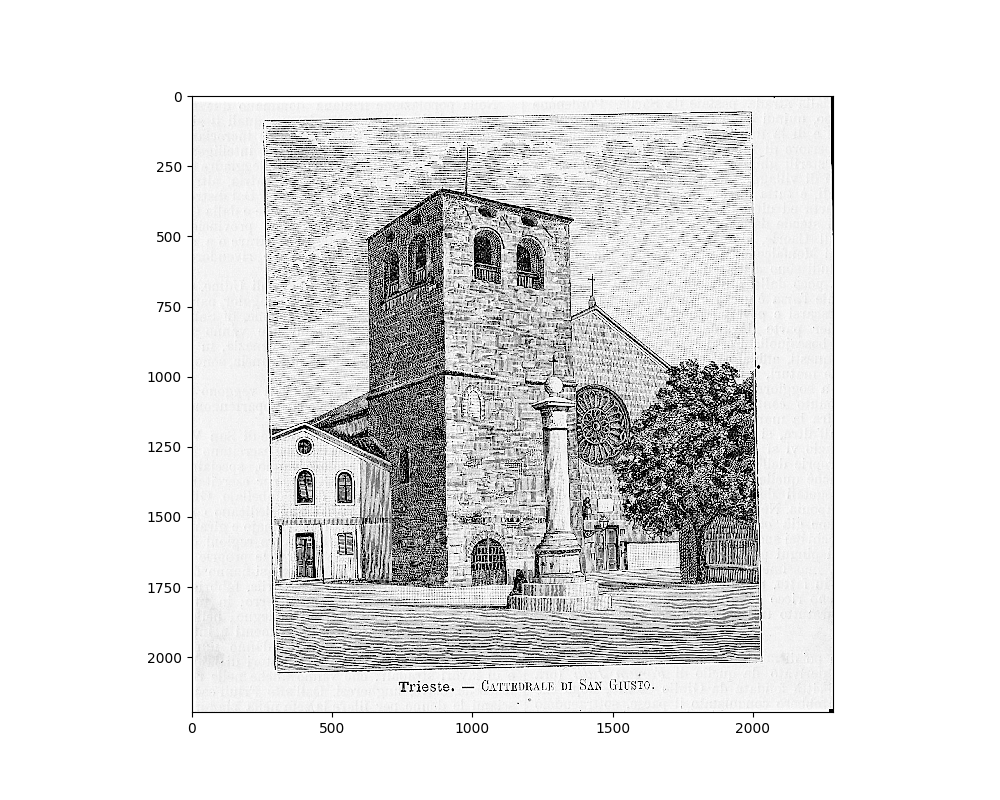

In [3]:
plt.figure(figsize=(10,8))
plt.imshow(im, cmap='gray')

#### Select a region of interest
Top right corner: the sky

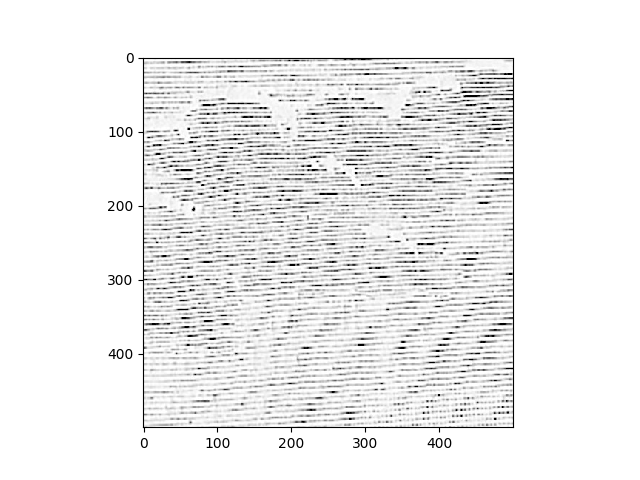

In [4]:
roi = im[100:600,1400:1900]

plt.figure()
plt.imshow(roi, cmap='gray')

#### Downsample by factors of 2 and 4
This is roughly equivalent to taking different sampling rates of a continuous signal

In [5]:
roi0 = roi.copy()
roi1 = roi[::2,::2]
roi2 = roi[::4,::4]
sh0 = roi0.shape
sh1 = roi1.shape
sh2 = roi2.shape
print(f'Original: {sh0}\n x2: {sh1}\n x4: {sh2}')

Original: (500, 500)
 x2: (250, 250)
 x4: (125, 125)


#### Show the result
Downsampling x4 has a strong effect on the image features: horizontal lines going slightly up from left to right now appear to go down from left to right, apart from having a coarser appearance.  

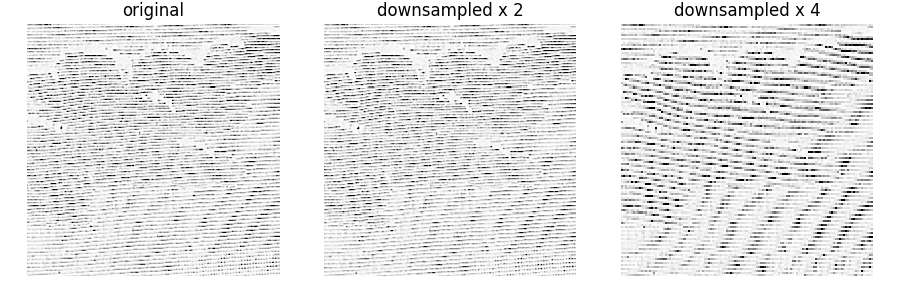

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, gridspec_kw={'wspace':0.1, 'hspace':0.1})
ax1.imshow(roi0, cmap='gray')
ax1.set_title('original')
ax1.axis('off')
ax2.imshow(roi1, cmap='gray')
ax2.set_title('downsampled x 2')
ax2.axis('off')
ax3.imshow(roi2, cmap='gray')
ax3.set_title('downsampled x 4')
ax3.axis('off')
plt.subplots_adjust(left=0.02, right=0.98, top=0.92, bottom=0.08)
fig.set_size_inches((9,3))

#### Compute FFTs
Subtract mean to reduce the required dynamic range in Fourier space (DC term will be 0). This is not at all necessray, it just make display a bit easier.

In [8]:
froi0 = np.fft.fftn(roi0 - roi0.mean())
froi1 = np.fft.fftn(roi1 - roi1.mean())
froi2 = np.fft.fftn(roi2 - roi2.mean())

#### Naively plotting the result is not ideal because of the position of the origin

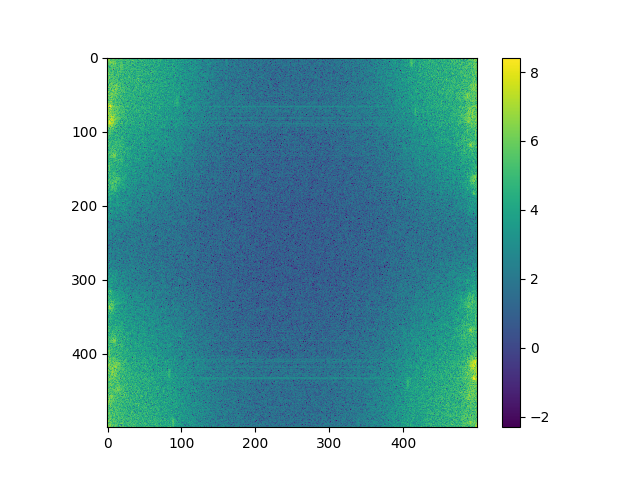

In [9]:
plt.figure()
plt.imshow(np.log(abs(froi0) + .1))
plt.colorbar()

#### Spatial frequencies start at (0,0) which is the top left corner. 
The function `numpy.fft.fftshift` rolls the array along all dimensions to bring (0,0) to the center of the image.

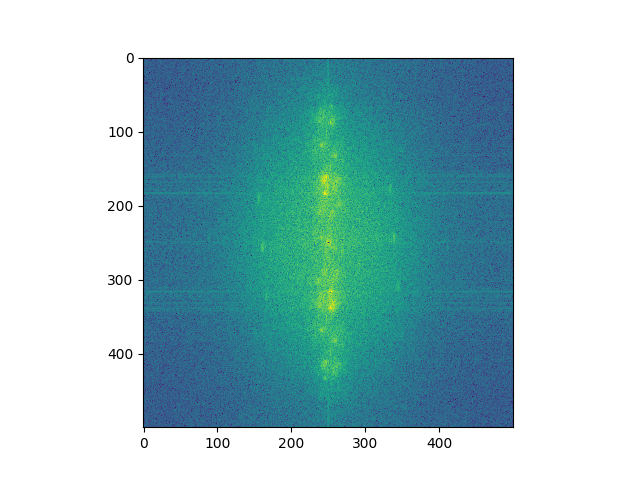

In [10]:
plt.figure()
plt.imshow(np.log(abs(np.fft.fftshift(froi0)) + .1))

#### Let's focus on one strong spatial frequency component

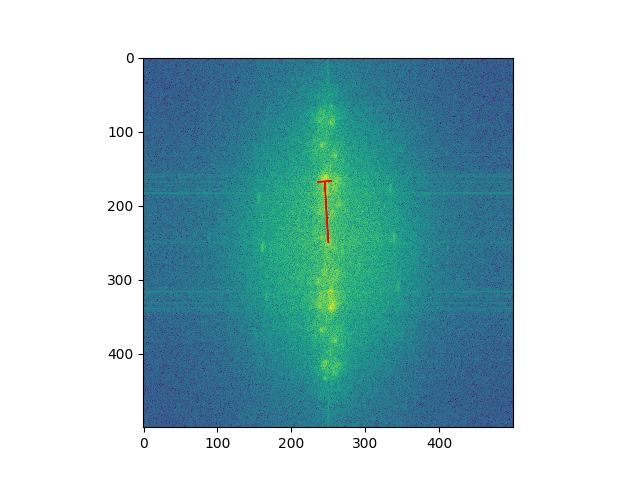

In [11]:
from matplotlib.patches import Circle
plt.figure()
plt.imshow(np.fft.fftshift(np.log(np.abs(froi0)+.1)))
ax = plt.gca()
ax.arrow(.5*sh0[1], .5*sh0[0], -5, -83, edgecolor='red', facecolor='red', linewidth=1, head_width=20, head_length=0, overhang=2, length_includes_head=True)
#ax.add_patch(Circle((-5, -83)))

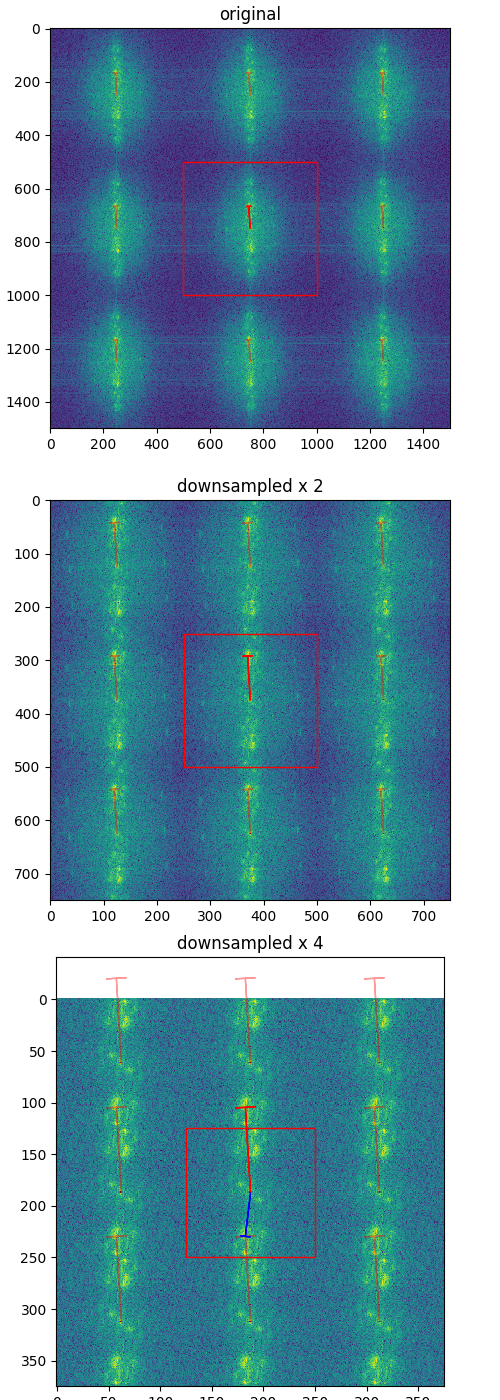

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=1, nrows=3, gridspec_kw={'wspace':0.1, 'hspace':0.1})

ax1.imshow(np.tile(np.fft.fftshift(np.log(np.abs(froi0)+1)), reps=(3,3)))
ax1.set_title('original')
rect = plt.Rectangle((sh0[1], sh0[1]), sh0[1], sh0[0], edgecolor='red', facecolor='None', linewidth=1)
ax1.add_patch(rect)
for xi in range(3):
    for yi in range(3):
        if xi == 1 and yi == 1:
            alpha = 1
        else:
            alpha = .4
        ax1.arrow((xi+.5)*sh0[1], (yi+.5)*sh0[0], -5, -83, edgecolor='red', facecolor='red', linewidth=1, head_width=20, head_length=0, overhang=2, length_includes_head=True, alpha=alpha)
#ax1.axis('off')
ax2.imshow(np.tile(np.fft.fftshift(np.log(np.abs(froi1)+1)), reps=(3,3)))
ax2.set_title('downsampled x 2')
rect = plt.Rectangle((sh1[1], sh1[1]), sh1[1], sh1[0], edgecolor='red', facecolor='None', linewidth=1)
ax2.add_patch(rect)
for xi in range(3):
    for yi in range(3):
        if xi == 1 and yi == 1:
            alpha = 1
        else:
            alpha = .4
        ax2.arrow((xi+.5)*sh1[1], (yi+.5)*sh1[0], -5, -83, edgecolor='red', facecolor='red', linewidth=1, head_width=20, head_length=0, overhang=2, length_includes_head=True, alpha=alpha)
#ax2.axis('off')
ax3.imshow(np.tile(np.fft.fftshift(np.log(np.abs(froi2)+1)), reps=(3,3)))
ax3.set_title('downsampled x 4')
rect = plt.Rectangle((sh2[1], sh2[1]), sh2[1], sh2[0], edgecolor='red', facecolor='None', linewidth=1)
ax3.add_patch(rect)
for xi in range(3):
    for yi in range(3):
        if xi == 1 and yi == 1:
            alpha = 1
        else:
            alpha = .4
        ax3.arrow((xi+.5)*sh2[1], (yi+.5)*sh2[0], -5, -83, edgecolor='red', facecolor='red', linewidth=1, head_width=20, head_length=0, overhang=2, length_includes_head=True, alpha=alpha)
ax3.arrow(1.5*sh2[1], 1.5*sh2[0], -5, sh2[1]-83, edgecolor='blue', facecolor='blue', linewidth=1, head_width=10, head_length=0, overhang=2, length_includes_head=True)
#ax3.axis('off')
plt.subplots_adjust(left=0.1, right=0.9, top=0.99, bottom=0.01)
fig.set_size_inches((5,14))


In [13]:
np.fft.fftfreq?

Signature: np.fft.fftfreq(n, d=1.0)
Docstring:
Return the Discrete Fourier Transform sample frequencies.

The returned float array `f` contains the frequency bin centers in cycles
per unit of the sample spacing (with zero at the start).  For instance, if
the sample spacing is in seconds, then the frequency unit is cycles/second.

Given a window length `n` and a sample spacing `d`::

  f = [0, 1, ...,   n/2-1,     -n/2, ..., -1] / (d*n)   if n is even
  f = [0, 1, ..., (n-1)/2, -(n-1)/2, ..., -1] / (d*n)   if n is odd

Parameters
----------
n : int
    Window length.
d : scalar, optional
    Sample spacing (inverse of the sampling rate). Defaults to 1.

Returns
-------
f : ndarray
    Array of length `n` containing the sample frequencies.

Examples
--------
>>> signal = np.array([-2, 8, 6, 4, 1, 0, 3, 5], dtype=float)
>>> fourier = np.fft.fft(signal)
>>> n = signal.size
>>> timestep = 0.1
>>> freq = np.fft.fftfreq(n, d=timestep)
>>> freq
array([ 0.  ,  1.25,  2.5 , ..., -3.75, -2.5 , -1

In [15]:
np.fft.fftfreq(50)

array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,
        0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,
        0.36,  0.38,  0.4 ,  0.42,  0.44,  0.46,  0.48, -0.5 , -0.48,
       -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34, -0.32, -0.3 ,
       -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16, -0.14, -0.12,
       -0.1 , -0.08, -0.06, -0.04, -0.02])